In [1]:
from holotomocupy.utils import *


In [ ]:
iter = 112
u = read_tiff(f'/data2//vnikitin/brain_rec/20251115/Y350a1234/4500_2048_0_0.0_0.003_0.05_0.02_20_1.1_0/rec_obj_real/{iter:04}.tiff')
n = u.shape[-1]

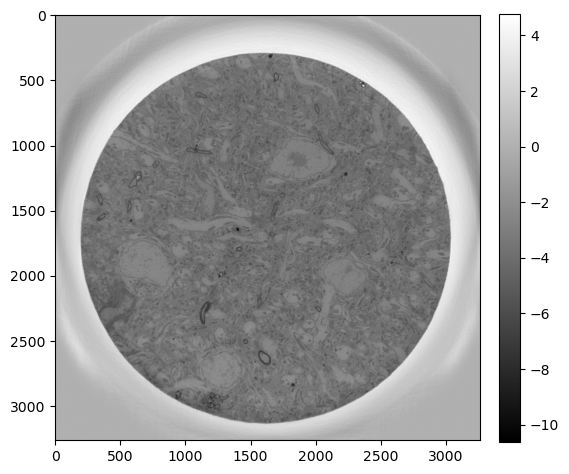

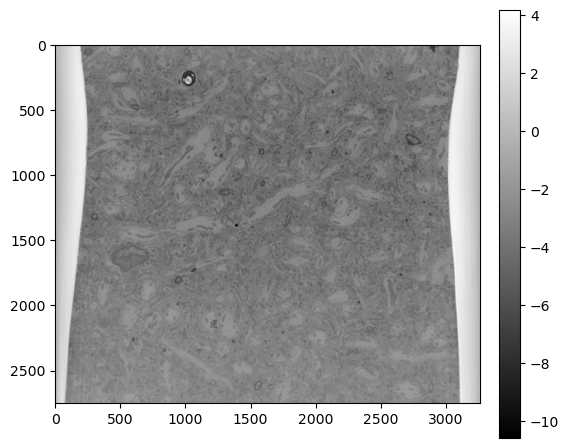

In [3]:
u = u[256:-256]
mshow(u[u.shape[0]//2],True)
mshow(u[:,u.shape[1]//2],True)


-5.668391 -2.3332386


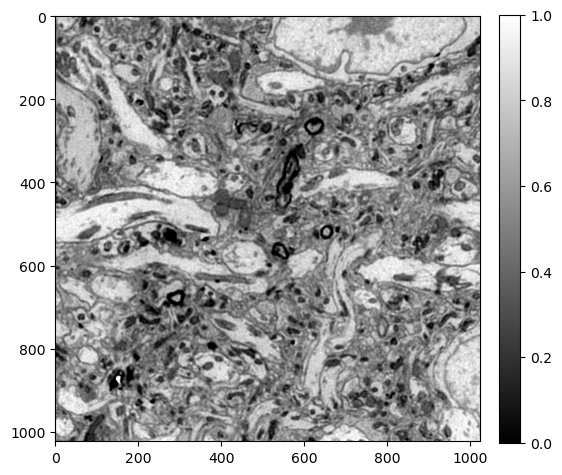

In [4]:
def find_min_max(data):
    """Find min and max values according to histogram"""

    h, e = np.histogram(data[:], 1000)
    stend = np.where(h > np.max(h)*0.03)
    st = stend[0][0]
    end = stend[0][-1]
    mmin = e[st]
    mmax = e[end+1]

    return mmin, mmax

aa=u[u.shape[0]//2,u.shape[1]//2-512:u.shape[1]//2+512,u.shape[1]//2-512:u.shape[1]//2+512]
mmin1,mmax1 = find_min_max(aa)
print(mmin1,mmax1)
mmin1*=1.
mmax1*=1
aa = (aa-mmin1)/(mmax1-mmin1)
aa[aa<0] = 0
aa[aa>1] = 1

mshow(aa,True)

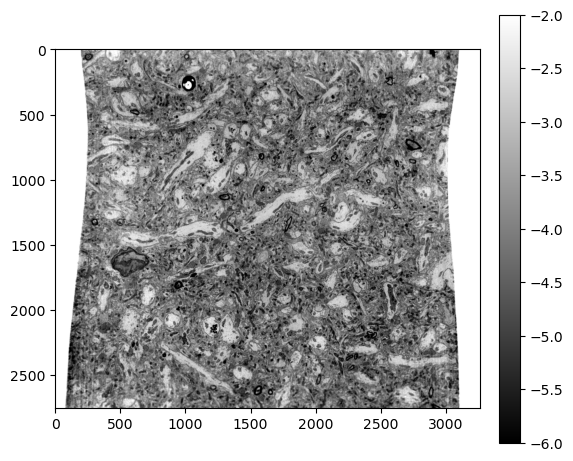

In [5]:
t = np.ones([u.shape[0]])
t[:1000] = np.linspace(1,1.1,1000)[::-1]
t[-1500:] = np.linspace(1,1.6,1500)
t = t[:,None,None]
u*=t
mshow(u[:,u.shape[1]//2],True,vmax=-2,vmin=-6)

In [6]:
u.shape

(2752, 3264, 3264)

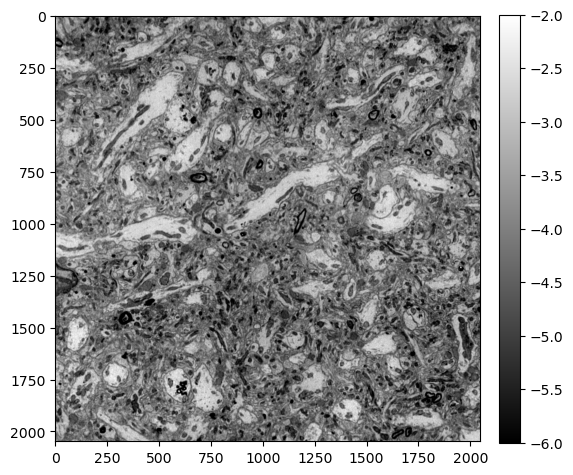

In [7]:
u = u[352:-352,608:-608,608:-608]
mshow(u[:,u.shape[1]//2],True,vmax=-2,vmin=-6)

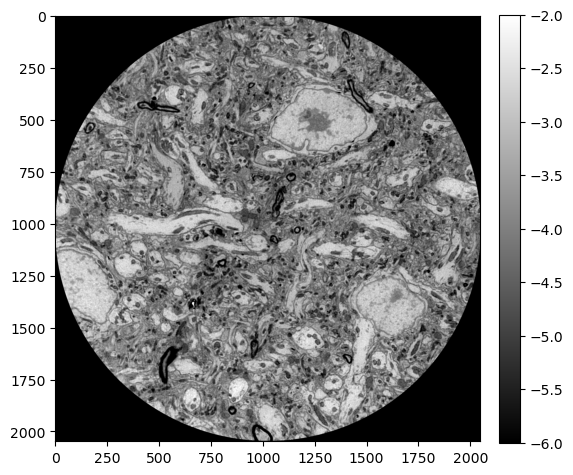

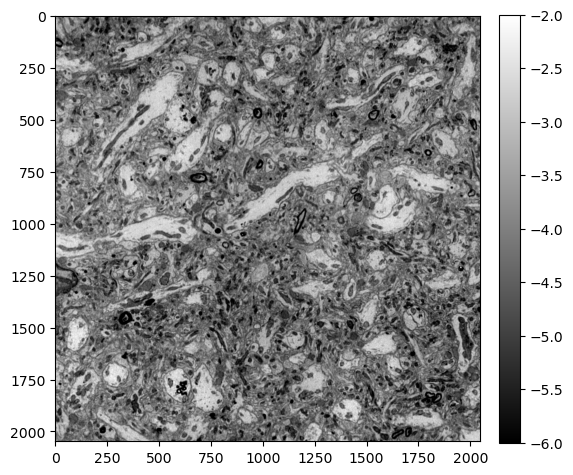

In [ ]:
[ny,nx] = u.shape[1:]
[x,y]=np.meshgrid(np.linspace(-1,1,ny),np.linspace(-1,1,nx))
circ = x**2+y**2<1
# u*=circ
# u+=(1-circ)*(-6)
mshow(u[u.shape[0]//2],True,vmax=-2,vmin=-6)
mshow(u[:,u.shape[1]//2],True,vmax=-2,vmin=-6)

In [9]:
# u[u>=-1e-6]=-6

In [10]:
from scipy.ndimage import median_filter
u = median_filter(u,size=(3,3,3))

In [ ]:
vvmin = -6
vvmax = -2
u[u>vvmax]=vvmax
u[u<vvmin]=vvmin
u = (u-vvmin)/(vvmax-vvmin)*65535
u = u.astype('uint16')
write_tiff(u,f'/data2/tmp/obj1234n_median3_2048')


ss

NameError: name 'ss' is not defined

In [16]:
(2048-2*384)**3


2097152000

In [17]:
write_tiff(u[384:-384,384:-384,384:-384],f'/data2/tmp/obj1234n_median3_1280')

In [ ]:
[nz,ny,nx] = u.shape
write_tiff(u[nz//2-256:nz//2+256,ny//2-256:ny//2+256,nx//2-256:nx//2+256],f'/data2/tmp/obj1234n_median3_t')

0


FileNotFoundError: [Errno 2] No such file or directory: '/data2/tmp/res/r0000.tif'

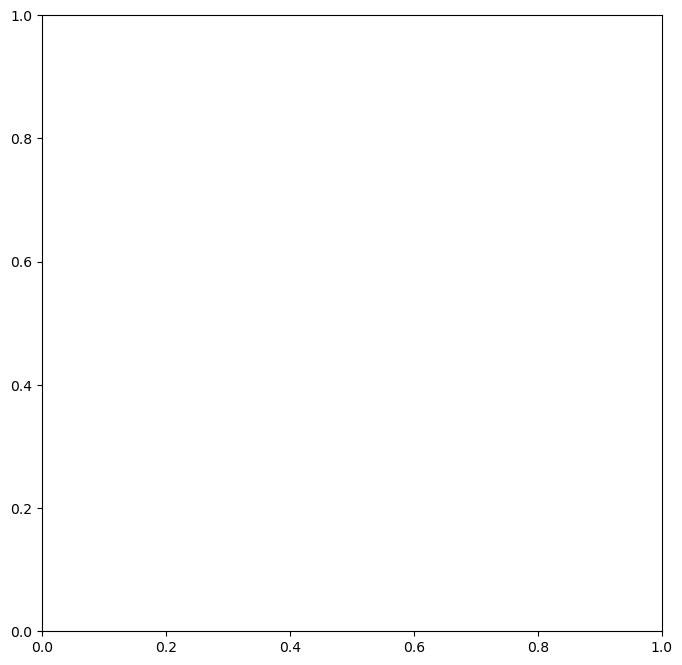

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

fig, ax = plt.subplots(figsize=(8,8))
def make_scalebar(v):
    scalebar = ScaleBar(v, "nm", length_fraction=0.1, font_properties={
                "family": "serif", "size": 10
            },  # For more information, see the cell below
    location="lower right")
    ax.add_artist(scalebar)
    
    
vmin = 20
vmax = 200
for r in range(0,2461,1):
    print(r)
    a = tifffile.imread(f'/data2/tmp/res/r{r:04}.tif')[:,:,0]   
    a[0,0]=vmin
    a[-1,-1]=vmax
    a[a<vmin]=vmin
    a[a>vmax]=vmax
    # plt.clf() 
    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(a,vmin=vmin,vmax=vmax,cmap='gray')    
    ax.set_axis_off()
    if r<200:
        make_scalebar(65)     
    if r>=1030 and r<1375:
        make_scalebar(11)     
    if r>=1900 and r<2300:
        make_scalebar(10)     
    # fig.colorbar(im, fraction=0.046, pad=0.04)
    # plt.show()
    plt.savefig(f'/data2/tmp/res2/{r:04}.png',dpi=300,bbox_inches='tight')
    plt.close(fig)